In [1]:
import pandas as pd # dataset loading
import matplotlib.pyplot as plt # for creating graphical representations

In [2]:
wine_df = pd.read_csv('winequality-red.csv')
print('** Dataset loaded successfully **\n')
print('** Head of Wine Quality Data **')
display(wine_df.head())
print('** Tail of Wine Quality Data **')
display(wine_df.tail())

** Dataset loaded successfully **

** Head of Wine Quality Data **


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


** Tail of Wine Quality Data **


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
# describing dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print('Columns of wine-quality data')
wine_df.columns

Columns of wine-quality data


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# here is Feature Matrix of wine data
X = wine_df.drop("quality",1)  
# here is Target Column of wine data
y = wine_df["quality"]  

In [6]:
# number of quality labels
print('number of quality labels') 
wine_df['quality'].value_counts()

number of quality labels


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## **1) Isomap** 

**Following parameters are used in Isomap**


*   n_neighbors=7 for calculating local structure
*   n_component=3 our number of dims
*   neighbor_algorithm is 'ball tree'
*   metric is minkowski





In [7]:
from sklearn.manifold import Isomap 

_isomap = Isomap(n_neighbors=7,n_components=3, eigen_solver='dense',
             path_method='FW', neighbors_algorithm='ball_tree',
             n_jobs=-1, metric='minkowski')

X_isomap = _isomap.fit_transform(X)

In [8]:
# X_isomap contains new features
X_isomap

array([[-15.08752658,   3.59657539,   1.17461   ],
       [ 29.81969821,  -7.3388081 ,  -0.43976417],
       [ 11.14678845,   2.14284912,  -0.29804538],
       ...,
       [ -3.45540395, -14.78055569,   4.519564  ],
       [  2.82388227, -19.23229427,   2.86430694],
       [ -4.31566565,  -6.13925251,   3.56664017]])

Graph of isomap data with classes

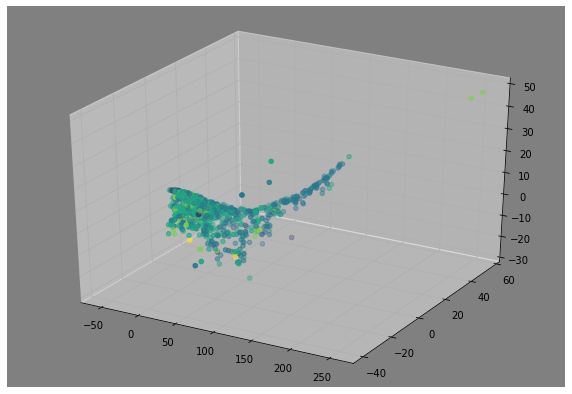

In [9]:
xs = X_isomap[:,0]
ys = X_isomap[:,1]
zs = X_isomap[:,2]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d', fc='gray')
ax.scatter(xs,ys,zs,c=y)
plt.show()

## **2) T-SNE**

**Following parameters are used in T-SNE**

*   n_component=3 our number of dims
*   n_iteration=800 number of iterations

In [10]:
from sklearn.manifold import TSNE
# intialization of tsne with parameters
wine_tsne = TSNE(n_components=3, verbose=1, perplexity=60, n_iter=800)
# passing feature matrix in tsne
wine_tsne_data = wine_tsne.fit_transform(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.005s...
[t-SNE] Computed neighbors for 1599 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 2.791020
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.909084
[t-SNE] KL divergence after 800 iterations: 0.345217


In [11]:
wine_tsne_data

array([[-7.3831487 ,  1.2044855 , -0.34289646],
       [ 3.4543679 , -1.5149274 , -8.7262945 ],
       [-1.3857217 ,  1.4777385 , -7.858737  ],
       ...,
       [-3.6642137 , -5.241203  , -5.093176  ],
       [-2.2828653 , -5.613679  , -6.080947  ],
       [-5.3769903 , -1.5783329 , -5.001454  ]], dtype=float32)

Graph of TSNE data with classes

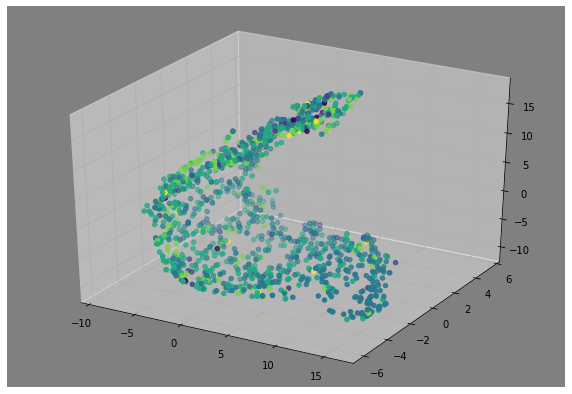

In [12]:
xs = wine_tsne_data[:,0]
ys = wine_tsne_data[:,1]
zs = wine_tsne_data[:,2]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d', fc='gray')
ax.scatter(xs,ys,zs,c=y)
plt.show()

## **3) PCA**

**Following parameters are used in PCA**

*   n_component=3 our number of dims

In [13]:
from sklearn.decomposition import PCA
# intialization of wine_pca with dimensions parameters
wine_pca = PCA(n_components=3)
# passing valuse of feature matrix of pca
wine_pca_result = wine_pca.fit_transform(X.values)

In [14]:
wine_pca_result

array([[-13.22490501,  -2.02389981,  -1.12682053],
       [ 22.03772361,   4.40832155,  -0.31037799],
       [  7.16267333,  -2.50146086,  -0.5818683 ],
       ...,
       [ -3.43135351,  14.27124349,  -1.75071927],
       [  1.13287834,  16.31616732,  -2.13441396],
       [ -3.8743766 ,   3.12634754,  -1.87414925]])

Graph of PCA data with classes

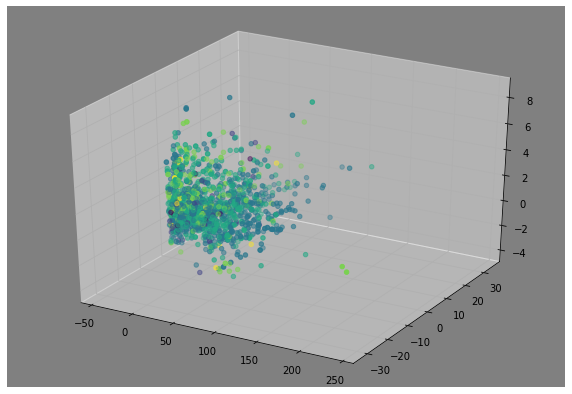

In [15]:
xs = wine_pca_result[:,0]
ys = wine_pca_result[:,1]
zs = wine_pca_result[:,2]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d', fc='gray')
ax.scatter(xs,ys,zs,c=y)
plt.show()